In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
Delivery_time_data=pd.read_csv("delivery_time.csv")

In [3]:
Delivery_time_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# feature engineering

In [4]:
Delivery_time_data=Delivery_time_data.rename({"Delivery Time":"Delivery_Time", "Sorting Time":"Sorting_Time"}, axis=1)

In [5]:
Delivery_time_data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# splitting data into test and train

In [6]:
Delivery_time_data_train=Delivery_time_data.iloc[:18,:]

In [7]:
Delivery_time_data_train

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
Delivery_time_data_test=Delivery_time_data.iloc[18:,:]

In [9]:
Delivery_time_data_test=Delivery_time_data_test.reset_index(drop=True)

In [10]:
Delivery_time_data_test

,Delivery_Time,Sorting_Time
0,8.00,2
1,17.83,7
2,21.50,5


# EDA and Data Visualization

In [11]:
Delivery_time_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  18 non-null     float64
 1   Sorting_Time   18 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 416.0 bytes


In [12]:
pd.get_dummies(Delivery_time_data_train)==True

,Delivery_Time,Sorting_Time
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

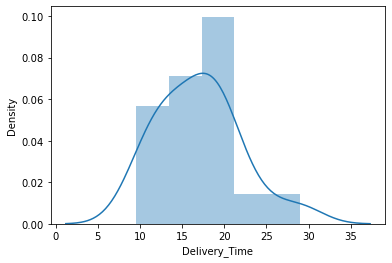

In [13]:
sns.distplot(Delivery_time_data_train["Delivery_Time"])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

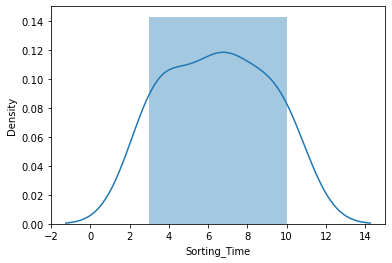

In [14]:
sns.distplot(Delivery_time_data_train["Sorting_Time"])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sorting_Time'>

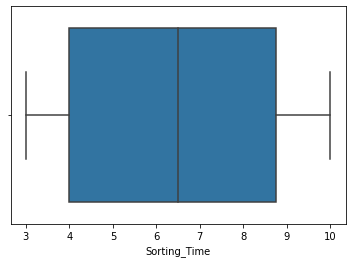

In [15]:
sns.boxplot(Delivery_time_data_train["Sorting_Time"])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delivery_Time'>

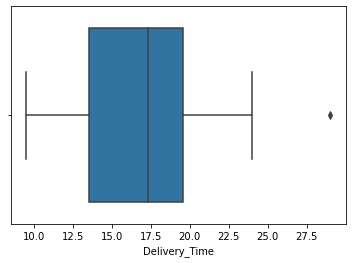

In [17]:
sns.boxplot(Delivery_time_data_train["Delivery_Time"])

# removing outliers

In [17]:
np.where(Delivery_time_data_train["Delivery_Time"]>25)

(array([4], dtype=int64),)

In [18]:
Delivery_time_data_train.drop([4], inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_4144\849185733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Delivery_time_data_train.drop([4], inplace=True)


In [19]:
Delivery_time_data_train

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9
10,19.83,8


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delivery_Time'>

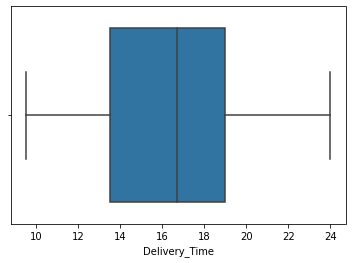

In [20]:
sns.boxplot(Delivery_time_data_train["Delivery_Time"])

In [21]:
pd.get_dummies(Delivery_time_data_train)==True

,Delivery_Time,Sorting_Time
0,False,False
1,False,False
2,False,False
3,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False
10,False,False


In [22]:
Delivery_time_data_train.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.857443
Sorting_Time,0.857443,1.000000


<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

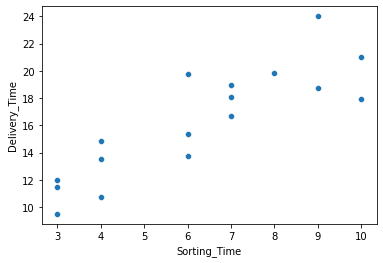

In [23]:
sns.scatterplot(x=Delivery_time_data_train["Sorting_Time"], y=Delivery_time_data_train["Delivery_Time"])

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

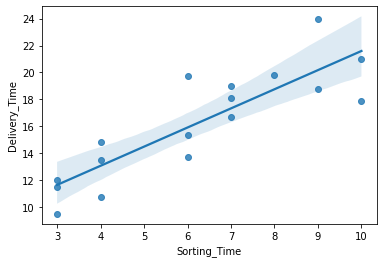

In [24]:
sns.regplot(x=Delivery_time_data_train["Sorting_Time"], y=Delivery_time_data_train["Delivery_Time"])

# model building

In [25]:
model=smf.ols("Delivery_Time~Sorting_Time",data=Delivery_time_data_train).fit()

In [26]:
model.params

Intercept       7.400309
Sorting_Time    1.419573
dtype: float64

In [27]:
model.tvalues

Intercept       5.044928
Sorting_Time    6.453559
dtype: float64

In [28]:
model.pvalues

Intercept       0.000145
Sorting_Time    0.000011
dtype: float64

In [29]:
model.rsquared

0.735208893328581

In [30]:
model.rsquared_adj

0.7175561528838197

In [31]:
model.predict(Delivery_time_data_test["Sorting_Time"])

0    10.239455
1    17.337321
2    14.498175
dtype: float64

In [32]:
Delivery_time_data_test["Predicted_Delivery_Time"]= model.predict(Delivery_time_data_test["Sorting_Time"])

In [33]:
Delivery_time_data_test

,Delivery_Time,Sorting_Time,Predicted_Delivery_Time
0,8.00,2,10.239455
1,17.83,7,17.337321
2,21.50,5,14.498175


In [34]:
Delivery_time_data_test["error"]=Delivery_time_data_test["Delivery_Time"]-Delivery_time_data_test["Predicted_Delivery_Time"]

In [35]:
Delivery_time_data_test

,Delivery_Time,Sorting_Time,Predicted_Delivery_Time,error
0,8.00,2,10.239455,-2.239455
1,17.83,7,17.337321,0.492679
2,21.50,5,14.498175,7.001825


C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delivery_Time'>

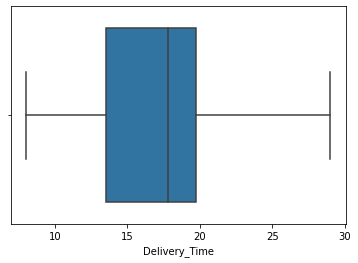

In [19]:
sns.boxplot(Delivery_time_data["Delivery_Time"])